## Random Forest

Missing values in each column:
 Unnamed: 0              0
GridId                  0
Toid                    0
GRID_ExactCut_ID        0
Location_ExactCut       0
BoroughName_ExactCut    0
Lts                     0
Length (m)              0
Emissions               0
Year                    0
Pollutant               0
Emissions Unit          0
VehicleType             0
Emission Value          0
RowID                   0
TLRN                    0
MotorwayNumber          0
Speed (kph)             0
AADT                    0
VKM                     0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


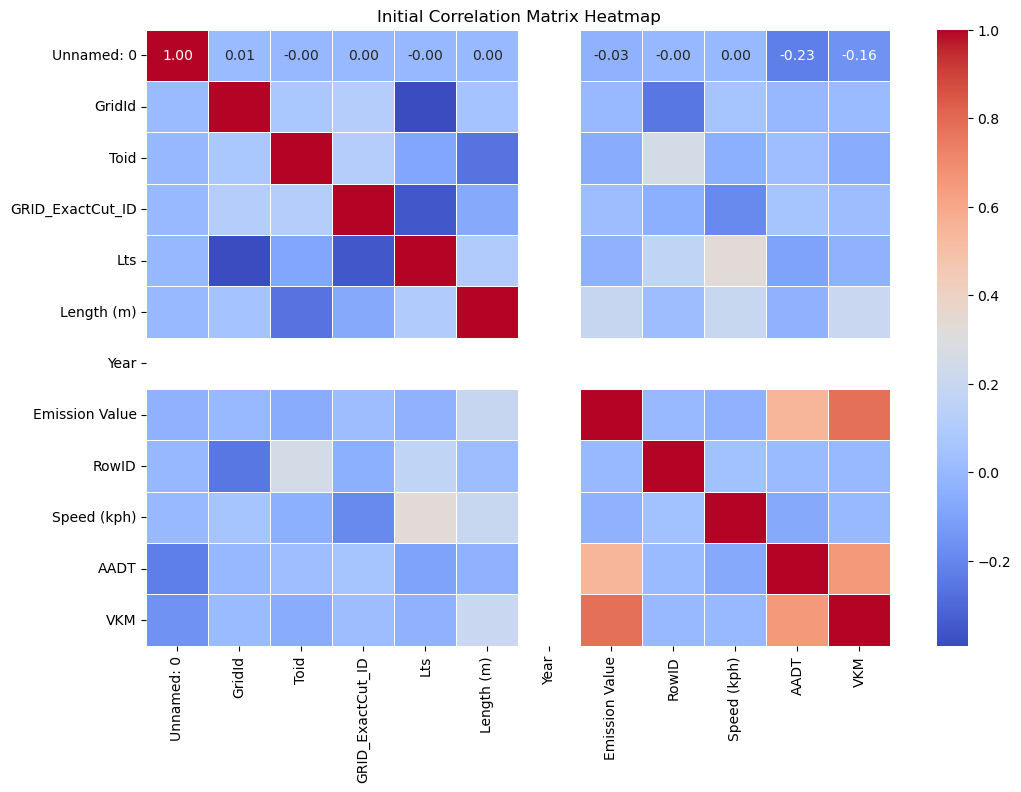

Emission Value          1.000000
VKM                     0.778763
AADT                    0.546873
Length (m)              0.193900
VehicleType             0.075468
Toid                    0.055868
Unnamed: 0              0.033606
Speed (kph)             0.032406
Lts                     0.031983
GRID_ExactCut_ID        0.018073
BoroughName_ExactCut    0.017632
Location_ExactCut       0.004152
TLRN                    0.003344
RowID                   0.002650
GridId                  0.002186
Emissions                    NaN
Year                         NaN
Pollutant                    NaN
Emissions Unit               NaN
MotorwayNumber               NaN
Name: Emission Value, dtype: float64
['Emission Value', 'VKM', 'AADT', 'Length (m)', 'VehicleType', 'Toid']


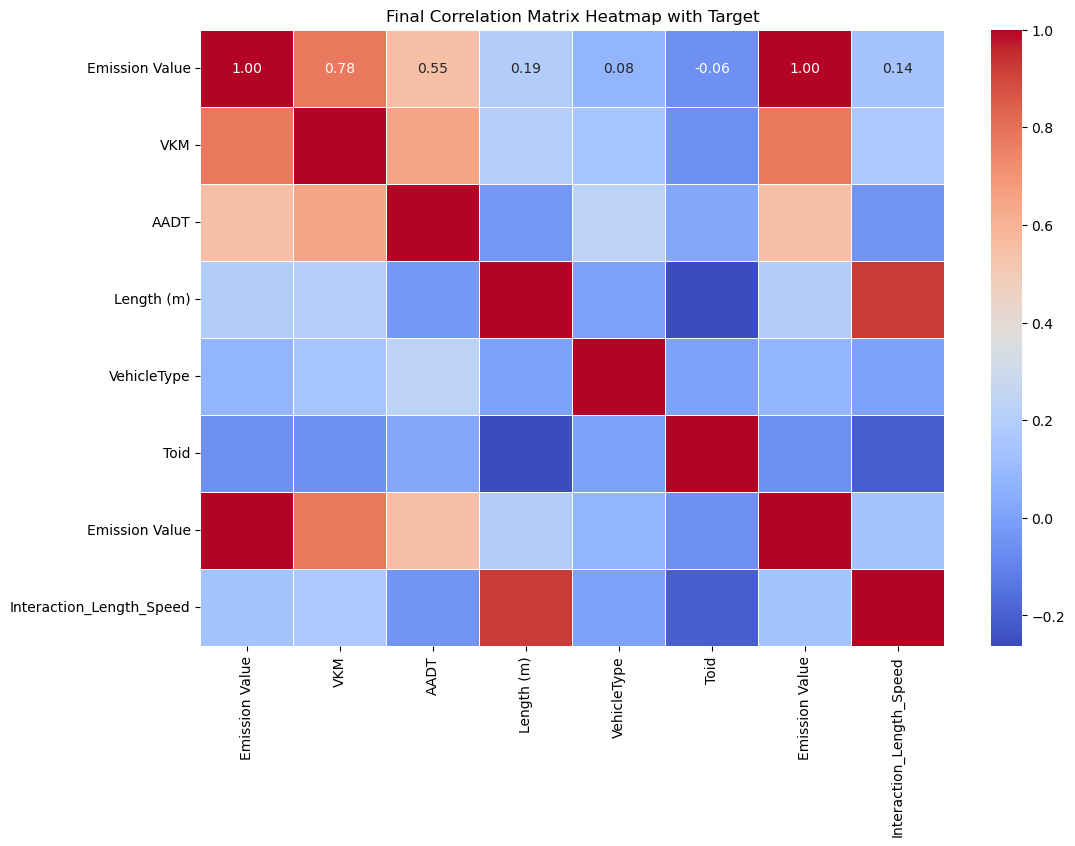

        VKM      AADT  Length (m)  VehicleType      Toid  \
0 -0.023502  0.095732   -0.327321     0.434524 -6.243198   
1 -0.246166 -0.353113   -0.578696     0.434524 -6.144199   
2  1.043801  0.095732    2.431609     0.434524 -6.298176   
3 -0.246166 -0.353113   -0.583481     0.434524 -6.298100   
4  0.915810  0.242550    1.360420     0.434524 -6.298087   

   Interaction_Length_Speed  
0                 -0.117514  
1                 -0.444328  
2                  2.061928  
3                 -0.455785  
4                  0.587842  


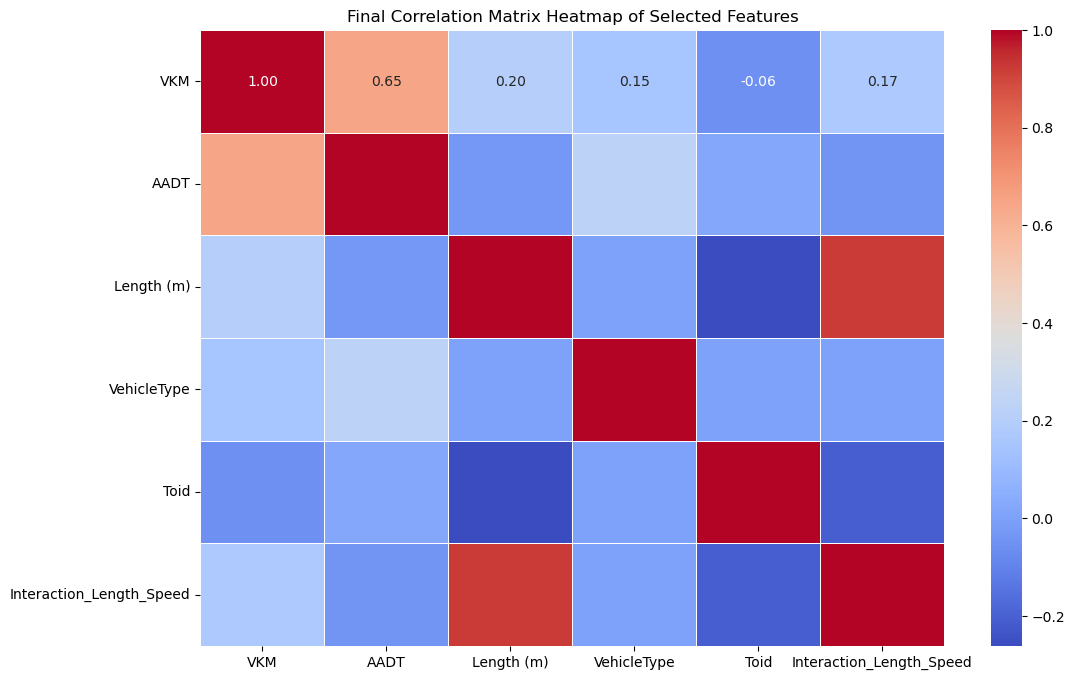

In [1]:
%run data_prep_and_analysis.ipynb

In [3]:
from skopt import BayesSearchCV
import joblib

# Define the parameter space
param_space = {
    'n_estimators': (10, 100),
    'max_depth': (1, 20),
    'min_samples_split': (2, 20)
}

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(estimator=RandomForestRegressor(random_state=42),
                             search_spaces=param_space,
                             n_iter=50,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1,  # Use all available cores
                             cv=5,
                             random_state=42)

# Fit Bayesian search
bayes_search.fit(X_train, y_train)

# Best parameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

# Save the trained model
joblib.dump(bayes_search, 'bayes_search_model.pkl')

/opt/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 2, 100] before, using random point [6, 9, 44]
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 2, 100] before, using random point [19, 16, 58]
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 2, 100] before, using random point [4, 14, 81]
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 2, 100] before, using random point [5, 9, 27]
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 2, 100] before, using random point [3, 14, 91]
  warnin

Best Hyperparameters: OrderedDict([('max_depth', 20), ('min_samples_split', 2), ('n_estimators', 100)])


['bayes_search_model.pkl']

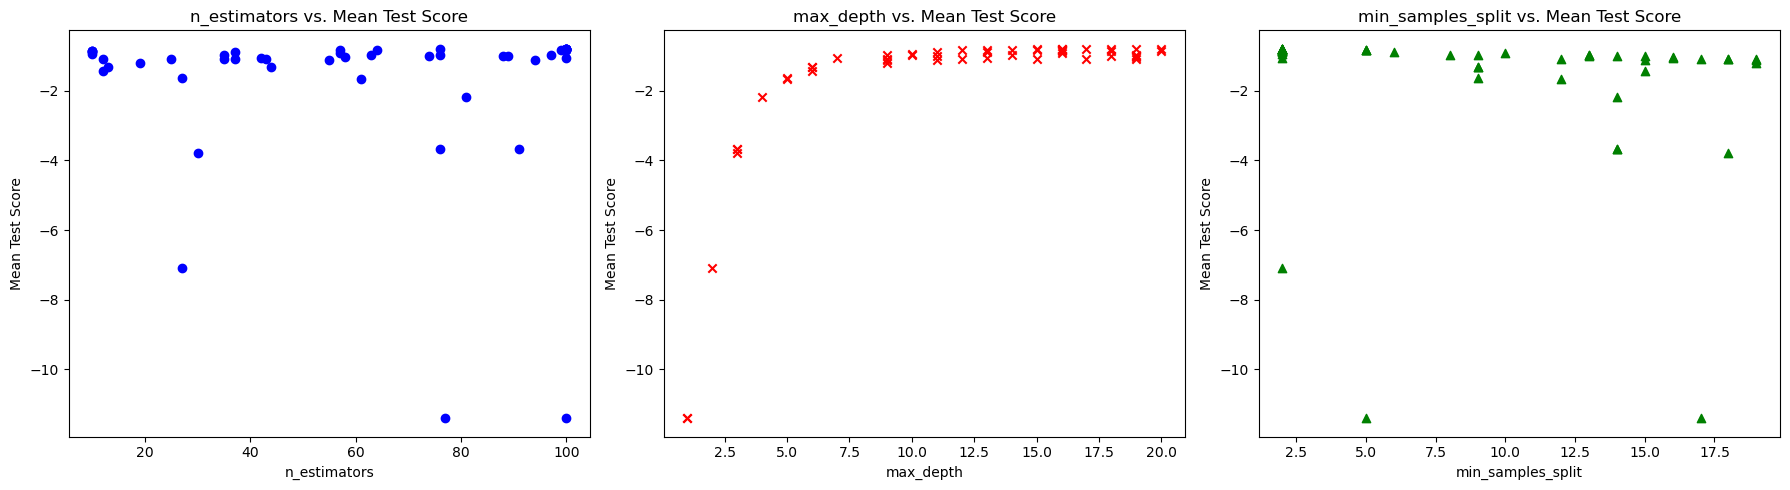

Best Hyperparameters: OrderedDict([('max_depth', 20), ('min_samples_split', 2), ('n_estimators', 100)])


In [5]:
# Extract results from BayesSearchCV
results = pd.DataFrame(bayes_search.cv_results_)

# Create subplots to visualize hyperparameter effects
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot n_estimators vs. mean_test_score
axs[0].scatter(results['param_n_estimators'], results['mean_test_score'], c='blue', marker='o')
axs[0].set_xlabel('n_estimators')
axs[0].set_ylabel('Mean Test Score')
axs[0].set_title('n_estimators vs. Mean Test Score')

# Plot max_depth vs. mean_test_score
axs[1].scatter(results['param_max_depth'], results['mean_test_score'], c='red', marker='x')
axs[1].set_xlabel('max_depth')
axs[1].set_ylabel('Mean Test Score')
axs[1].set_title('max_depth vs. Mean Test Score')

# Plot min_samples_split vs. mean_test_score
axs[2].scatter(results['param_min_samples_split'], results['mean_test_score'], c='green', marker='^')
axs[2].set_xlabel('min_samples_split')
axs[2].set_ylabel('Mean Test Score')
axs[2].set_title('min_samples_split vs. Mean Test Score')

plt.tight_layout()
plt.show()

# Best hyperparameters from Bayesian Optimization
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

In [9]:
import joblib

# Load the saved model
loaded_model = joblib.load('bayes_search_model.pkl')

# Use the loaded model to predict
y_pred = loaded_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Loaded Model - MAE: {mae}, MSE: {mse}, R^2: {r2}")

Loaded Model - MAE: 0.09615430353533201, MSE: 0.5638661624444575, R^2: 0.9687481558378158


Performance with Optimal Hyperparameters:

Mean Absolute Error (MAE): 0.09615430353533201

Mean Squared Error (MSE): 0.5638661624444575

R^2 Score: 0.9687481558378158

Model Performance Metrics:
Mean Squared Error: 0.5639
Root Mean Squared Error: 0.7509
R-squared Score: 0.9687
Mean Absolute Error: 0.0962


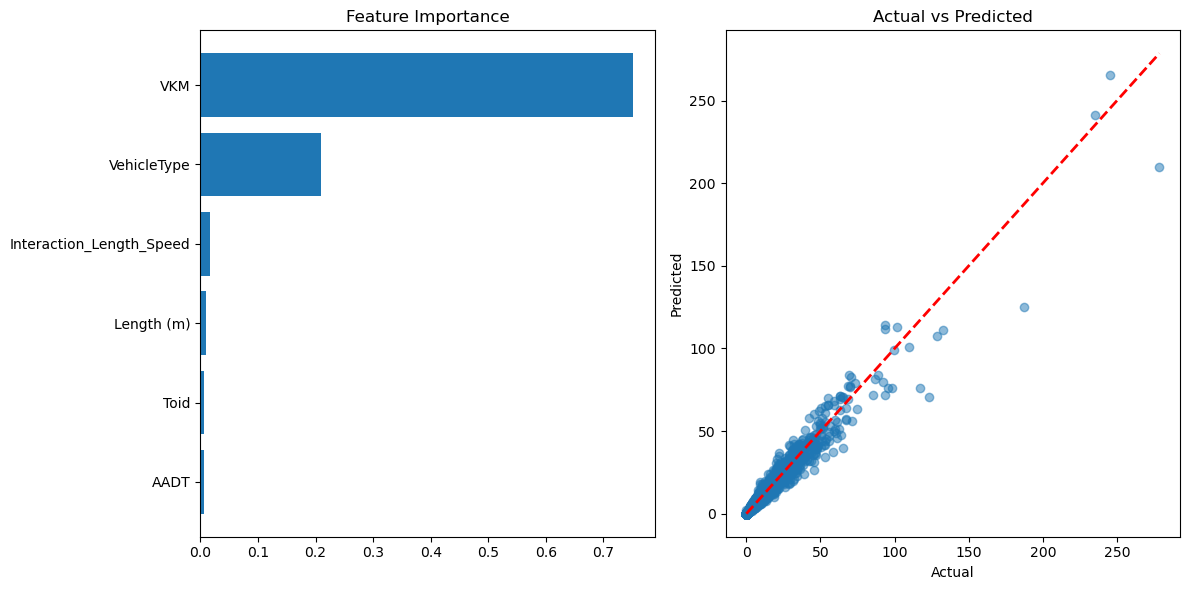

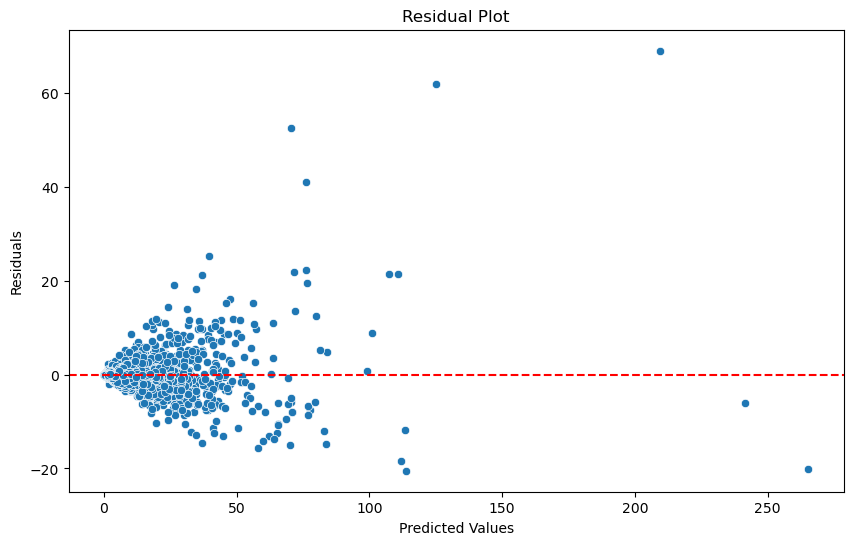

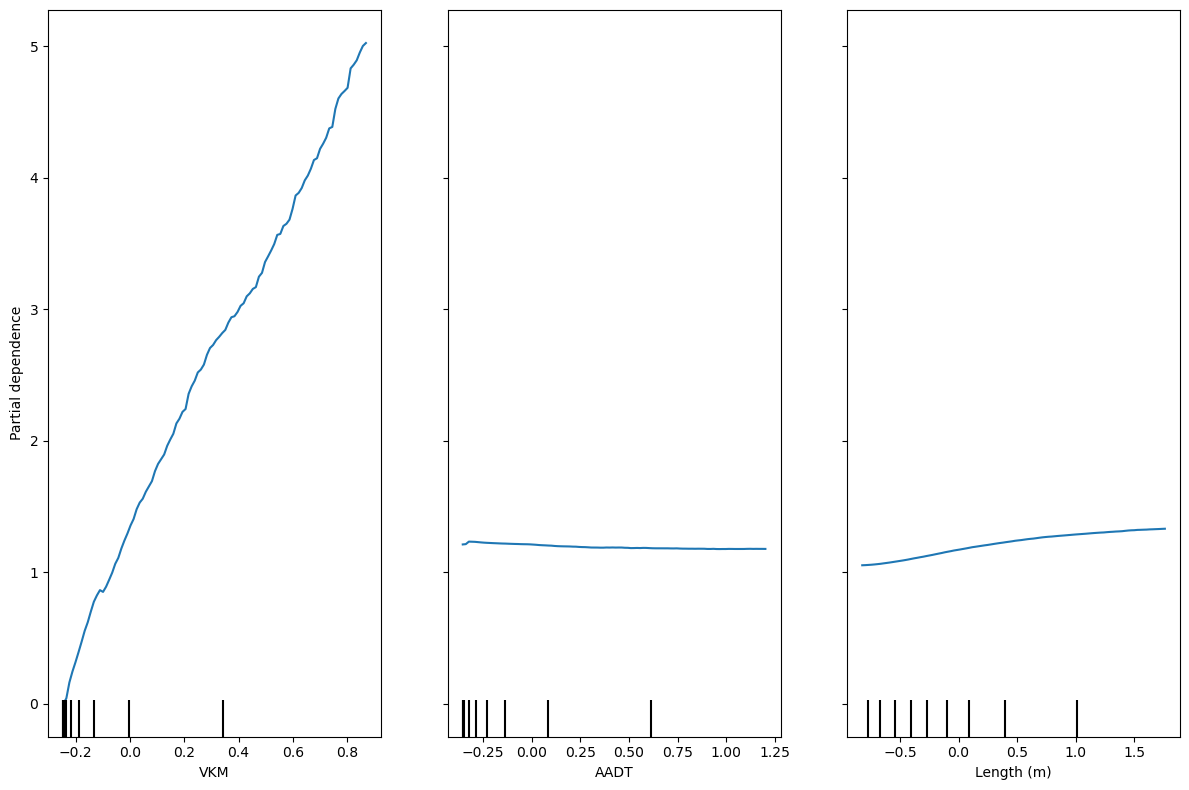

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


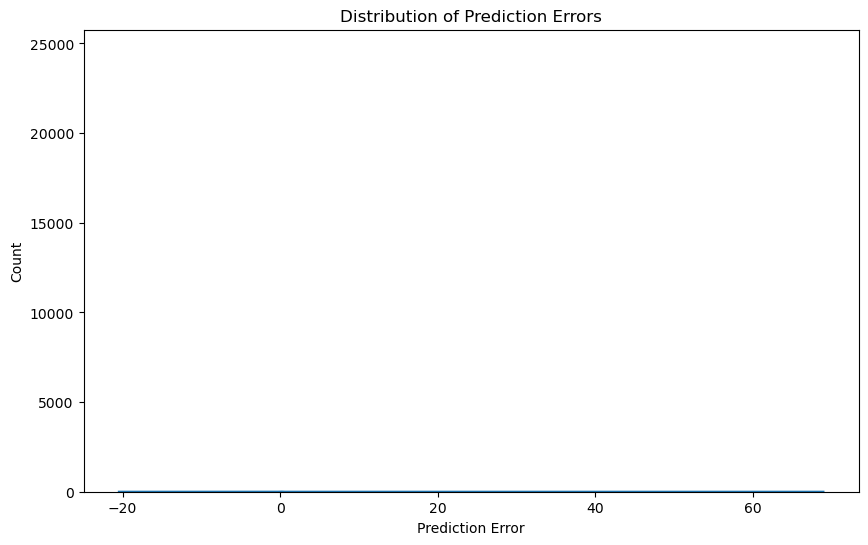

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay

# Get the best estimator
best_rf = bayes_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Feature Importance
feature_importance = best_rf.feature_importances_
feature_names = X_test.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Feature Importance plot
ax1.barh(pos, feature_importance[sorted_idx], align='center')
ax1.set_yticks(pos)
ax1.set_yticklabels(np.array(feature_names)[sorted_idx])
ax1.set_title('Feature Importance')

# Actual vs Predicted plot
ax2.scatter(y_test, y_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('Actual vs Predicted')

plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(best_rf, X_test, features=feature_names[:3], ax=ax)
plt.tight_layout()
plt.show()

# Distribution of Error
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()